# Prep files and libraries
* Import standard Numpy and Pandas libraries for analysis
* Bring in the census data from file and put in in a pandas dataframe
* Get rid of the geom column. It contains a lot of geographic data that we will not be using 
* Data was pulled from the [Baltimore City Public Data website](https://data.baltimorecity.gov/Neighborhoods/2010-Census-Neighborhoods/r3qj-2ifh)

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb



raw_data = pd.read_csv('2010_Census_Profile_by_Census_Tracts.csv')
del raw_data['the_geom']

#45 different catagories over 200 census blocks
print(raw_data.shape)

(200, 45)


# What are the columns that I have?
- We want to take a look at all the different columns we have, so we know what we are working with
- This should give us our first sense of the data

In [3]:
print(raw_data.columns)
raw_data[:5]

Index(['NAME', 'Population', 'White', 'Blk_AfAm', 'AmInd_AkNa', 'Asian',
       'NatHaw_Pac', 'Other_Race', 'TwoOrMore', 'Hisp_Lat', 'PopOver18',
       'Ovr18White', 'Ovr18Blk_A', 'Ovr18AmInd', 'Ovr18Asian', 'Ovr18Haw_P',
       'Ovr18Other', 'Ovr18TwoOr', 'Ovr18HispL', 'Male', 'Female', 'AGE0_4',
       'AGE5_11', 'AGE12_14', 'AGE15_17', 'AGE18_24', 'AGE25_34', 'AGE35_44',
       'AGE45_64', 'AGE65ovr', 'Families', 'Married', 'Married18', 'MaleHH',
       'MaleHH18', 'FemaleHH', 'FemaleHH18', 'Housing', 'Occupied', 'Occ_Own',
       'Occ_Rent', 'Vacant', 'Vac_Rent', 'Vac_Sale', 'Vac_Other'],
      dtype='object')


,NAME,Population,White,Blk_AfAm,AmInd_AkNa,Asian,NatHaw_Pac,Other_Race,TwoOrMore,Hisp_Lat,...,FemaleHH,FemaleHH18,Housing,Occupied,Occ_Own,Occ_Rent,Vacant,Vac_Rent,Vac_Sale,Vac_Other
0,Census Tract 1510,5214,94,5029,19,14,0,8,50,41,...,635,262,2339,1822,892,930,517,152,27,338
1,Census Tract 807,1137,22,1086,0,5,0,9,15,22,...,153,72,726,382,176,206,344,22,19,303
2,Census Tract 805,1704,12,1661,6,6,0,2,17,11,...,230,80,735,543,282,261,192,52,19,121
3,Census Tract 1505,1543,14,1486,3,2,0,10,28,6,...,211,85,757,679,281,398,78,21,6,51
4,Census Tract 2703.02,1764,759,914,4,27,0,17,43,40,...,127,61,786,707,500,207,79,31,8,40


# What is the population distribution look like?
Neighborhoods are broken up per hundred people, so the first bar represents 0-100 people, the second 100-200, and so on

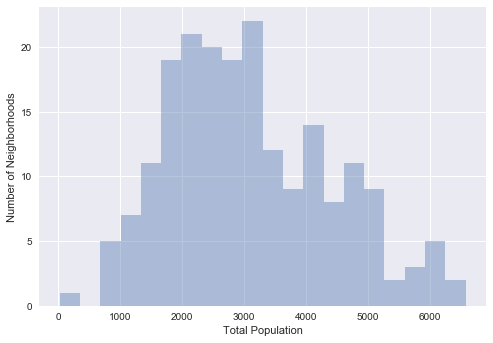

In [4]:
sb.distplot(raw_data['Population'], kde = False, bins = 20)
plt.ylabel("Number of Neighborhoods")
plt.xlabel('Total Population')
plt.show()

### What about neighborhood distributions based on racial make up?

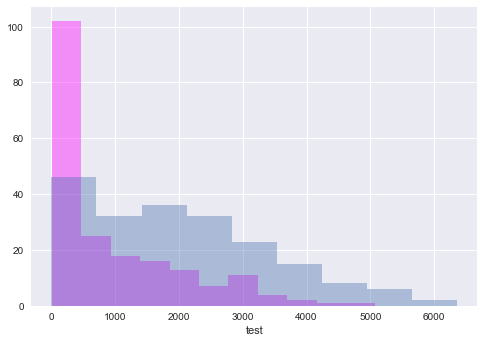

In [5]:
sb.distplot(raw_data['White'], kde = False, axlabel = "test", color = "#ff00ff")
sb.distplot(raw_data['Blk_AfAm'], kde = False, axlabel = "test")

### This gives us some interesting insights on basic baltimore Makups
* Over 100 (half) census districts in Baltimore contain fewer than 500 white citizens
* Black Neighborhods are a little more distibuted in terms of size. 

In [6]:
lauraville = raw_data[raw_data['NAME'] == 'Census Tract 2702']
lauraville

,NAME,Population,White,Blk_AfAm,AmInd_AkNa,Asian,NatHaw_Pac,Other_Race,TwoOrMore,Hisp_Lat,...,FemaleHH,FemaleHH18,Housing,Occupied,Occ_Own,Occ_Rent,Vacant,Vac_Rent,Vac_Sale,Vac_Other
90,Census Tract 2702,1914,1017,785,13,19,0,23,57,63,...,135,68,817,748,545,203,69,19,15,35


In [7]:
white_pop = raw_data['White'].copy().sort_values()
#print(white_pop)
print("Total white population of Baltimore (200 Census Districts): %d" % np.sum(white_pop))
print("Total white population in top 20 census districts: %d" % np.sum(white_pop[-20 : -1]))
print("Total white population in bottom 100 census districts: %d" % np.sum(white_pop[1 : 100]))
print('\n')


black_pop = raw_data['Blk_AfAm'].copy().sort_values()
print("Total black population of Baltimore (200 Census Districts): %d" % np.sum(black_pop))
print("Total black population in top 20 census districts: %d" % np.sum(black_pop[-20 : -1]))
print("Total black population in bottom 100 census districts: %d" % np.sum(black_pop[1 : 100]))

Total white population of Baltimore (200 Census Districts): 183830
Total white population in top 20 census districts: 61299
Total white population in bottom 100 census districts: 11093


Total black population of Baltimore (200 Census Districts): 395781
Total black population in top 20 census districts: 89757
Total black population in bottom 100 census districts: 82052


In [8]:
import matplotlib.pyplot as plt

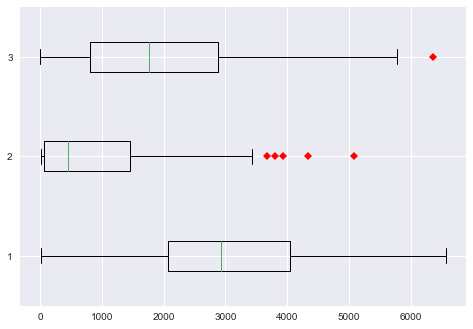

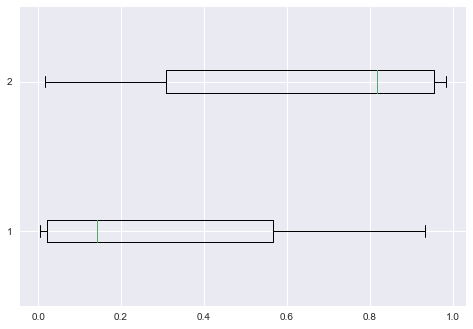

White Population Percent Median and Standard Deviation: 0.141840497175, 0.3080005930554685
Black Population Percent Median and Standard Deviation: 0.816532009549, 0.34623771993746677
Total Population Standard Deviation: 1320.7887669778995


In [9]:
plt.boxplot([raw_data['Population'], raw_data['White'], raw_data['Blk_AfAm'] ], 0, 'rD', 0)
plt.figure()
#plt.boxplot(raw_data['White'], 0, '', 0)
plt.figure()
w_percent = raw_data['White'] / raw_data['Population']
b_percent = raw_data['Blk_AfAm']/ raw_data['Population']
plt.boxplot([w_percent, b_percent], 0, 'rs', 0)
plt.figure()
plt.show()
print('White Population Percent Median and Standard Deviation: ' + str(np.median(w_percent)) + ', ' + str(np.std(w_percent)))
print('Black Population Percent Median and Standard Deviation: ' + str(np.median(b_percent)) + ', ' + str(np.std(b_percent)))
print("Total Population Standard Deviation: " + str(np.std(raw_data['Population'])))

In [10]:
print(np.sum(raw_data['White']))

183830


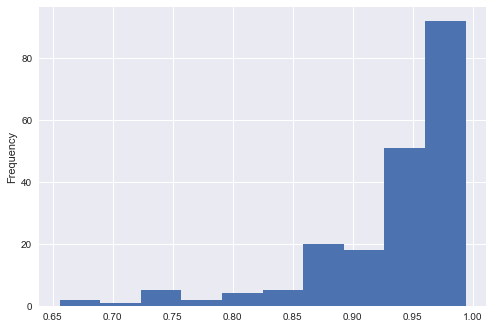

In [11]:
bw_percent = (raw_data['Blk_AfAm'] + raw_data['White'])/ raw_data['Population']
bw_percent.plot.hist()
plt.show()

# What number of neighborhoods in Baltimore are highly gentrified?
* Let's see where black and white populations make up more than 90% of the population

In [12]:
print("Neighborhoods where black and white people make up more than 90% of pop: ", bw_percent[bw_percent >.90].count())
print("Neighborhoods where white people make up more than 90% of pop: ", w_percent[w_percent >.90].count())
print("Neighborhoods where white people make up fewer than 29% of pop: ",w_percent[w_percent <.29].count()) #City wide average
print("Neighborhoods where black people make up more than 90% of pop: ", b_percent[b_percent >.90].count())

Neighborhoods where black and white people make up more than 90% of pop:  159
Neighborhoods where white people make up more than 90% of pop:  5
Neighborhoods where white people make up fewer than 29% of pop:  117
Neighborhoods where black people make up more than 90% of pop:  77


## There are 41 neighborhoods that are not overwhelmingly (90%) black and white. Let's look at the Asian and Hispanic population numbers in those areas

In [23]:
print(raw_data[(raw_data["White"] + raw_data['Blk_AfAm']) / raw_data['Population'] < .90][['NAME', 'Population', 'Asian', 'Hisp_Lat']])

                     NAME  Population  Asian  Hisp_Lat
5       Census Tract 1201        4790    860       167
8       Census Tract 1401        4974    361       163
10   Census Tract 1308.03        2748    216       113
13      Census Tract 1101        3223    349       155
17      Census Tract 1207        2476    219       113
19       Census Tract 601        3222     61       818
21      Census Tract 1102        5072    422       240
24   Census Tract 2708.04        2804    102       209
49      Census Tract 1206        3269    214       185
55      Census Tract 2610        3253     43       944
59   Census Tract 2503.03        2324     85       119
65       Census Tract 102        3009     72       489
67      Census Tract 2609        2652     84       264
76      Census Tract 1902        1920     34       175
88       Census Tract 401        4006    835       225
99      Census Tract 2506          22      0         5
100     Census Tract 2505        5468    114       348
108      C

# There are many interesting looking results that we could get by looking at percentages, so let's create a DataFrame that is solely that.

In [14]:
percentage = 100 * raw_data[['Blk_AfAm', 'White', 'Asian', 'Hisp_Lat']].copy().div(raw_data['Population'],  axis = 0)
percentage['NAME'] = raw_data['NAME']
percentage.rename(columns = {'Blk_AfAm' : 'Black', 'Hisp_Lat' : 'Hispanic/Latino'}, inplace = True)

# How many neighborhods count X% of an ethnic group?
* Each bar represents a 5% increase in neighborhood population (e.g. If one bar is 20%, the next represents 25%)
* Each graph represents a different ethnic backgound
* Note: not all graphs have the same y-axis dimension, do to underrepresentation of certain ethnic groups in a significant number of neighborhoods (E.G. There are over 100 neighborhoods that are between 0%-5% Asian)

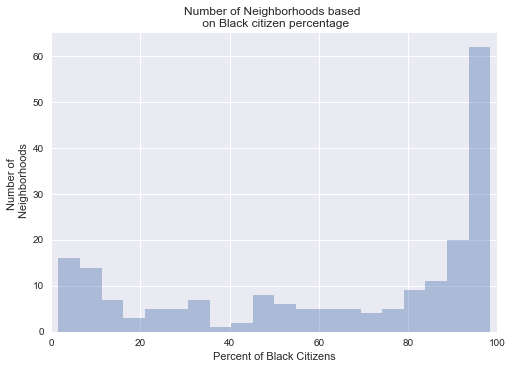

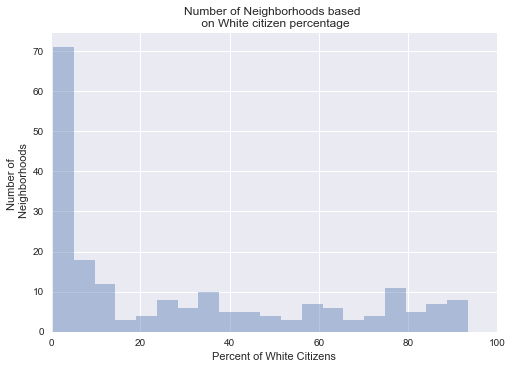

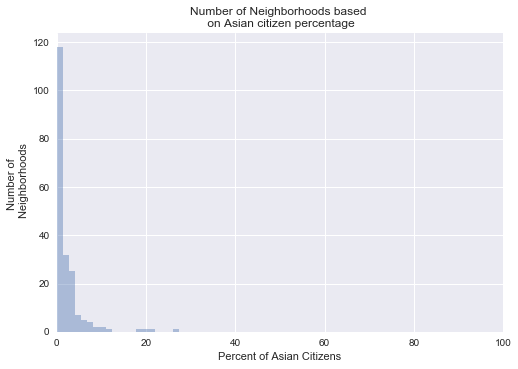

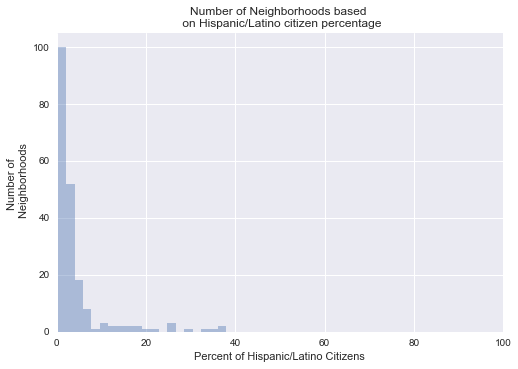

In [15]:
for col in percentage:
    if col == 'NAME':
        break
    sb.distplot(percentage[col], kde = False, bins = 20)
    plt.title('Number of Neighborhoods based \n on ' + col + " citizen percentage")
    plt.xlabel('Percent of ' + col + ' Citizens')
    plt.ylabel('Number of \n Neighborhoods')
    plt.xlim(0,100)
    plt.show()

# Interesting Results
* There is a strong up tick in neighborhoods that are 80% or greater black.
* There is a strange lack of Neighborhoods that are between 40%-50% black.
* The white graph almost mirrors the black one (makes sense, since these are the majority populations)
* Latinos and Asians do not make up a majority in any census block in the city, although there are pockets with significant populations of each. Future analysis could be down to see how these are related geographically.